In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

# IMPORT DATASETS

In [2]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [3]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [4]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

In [6]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [9]:
df = df.drop_duplicates(subset='title')

In [10]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
1328,Big Eyes,Documentary,7.2,43,2014,11119,[18],87093,en,Big Eyes,12.017,2014-12-25,7.0,2153,23,"Dec 25, 2014",Big Eyes,"$10,000,000","$14,482,031","$27,317,872"
859,Hell or High Water,"Action,Crime,Drama",7.6,176469,2016,17449,"[80, 18, 53, 37]",338766,en,Hell or High Water,15.749,2016-08-12,7.3,2468,77,"Aug 12, 2016",Hell or High Water,"$12,000,000","$27,007,844","$37,584,304"
70,Lights Out,Drama,8.6,22,2013,17495,"[53, 9648, 27]",345911,en,Lights Out,12.408,2016-07-22,6.3,2220,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510"
816,Highway,"Crime,Drama,Romance",7.7,23434,2014,5965,[],143942,en,Highway,2.409,2012-09-09,2.7,3,89,"Dec 31, 2012",Highway,"$2,000,000",$0,$0
2831,Paranormal Activity 2,Horror,5.7,93122,2010,228,"[27, 53]",41436,en,Paranormal Activity 2,8.163,2010-10-21,5.7,1342,65,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032"


# DATA CLEANING

In [11]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [12]:
df = df.dropna()

In [13]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
1842,Suspiria,"Fantasy,Horror,Mystery",6.8,37360,2018-10-26,"$20,000,000","$7,034,615"
3121,Alex Cross,"Action,Crime,Mystery",5.1,30951,2012-10-18,"$35,000,000","$35,426,759"
1883,"Paul, Apostle of Christ","Adventure,Biography,Drama",6.7,5662,2018-03-28,"$5,000,000","$25,529,498"
3053,The Other Side of the Door,Horror,5.3,15813,2016-03-11,"$5,000,000","$12,905,107"
676,Amour,"Drama,Romance",7.9,84960,2012-12-19,"$9,700,000","$36,787,044"


In [14]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [15]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [18]:
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [29]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1775 non-null   object        
 1   genres             1775 non-null   category      
 2   ratings            1775 non-null   float64       
 3   votes              1775 non-null   int64         
 4   release_date_x     1775 non-null   datetime64[ns]
 5   production_budget  1775 non-null   object        
 6   worldwide_gross    1775 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 99.6+ KB


In [23]:
df['genres'] = df['genres'].astype('category')

In [30]:
df['production_budget'] = df['production_budget'].astype('float')

In [129]:
# turn the budget to million
df['production_budget'] = df['production_budget']/1000000

<ipython-input-129-0f4b159dc021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_budget'] = df['production_budget']/1000000


In [131]:
df.rename(columns = {'production_budget':'production_budget_million'}, inplace = True)

C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [132]:
df

,title,genres,ratings,votes,release_date_x,production_budget_million,worldwide_gross,genre counts
0,Crossroads,Documentary,9.3,22,2017-10-14,12.0,57000000.0,NaN
12,The Runaways,Adventure,9.2,47,2010-03-19,9.5,5278632.0,NaN
14,The Wall,Documentary,9.2,8,2013-06-07,3.0,4495262.0,NaN
22,Survivor,Documentary,9.0,45,2012-08-29,20.0,1703281.0,NaN
28,Frankenstein,Drama,9.0,1832,2015-08-15,45.0,112006296.0,NaN
...,...,...,...,...,...,...,...,...
3356,Red River,Horror,2.3,179,2011-05-05,3.0,9012000.0,NaN
3357,Snow White: A Deadly Summer,Horror,2.2,679,2012-03-16,1.0,0.0,NaN
3358,United Passions,Drama,2.1,3878,2015-06-05,30.0,168832.0,NaN
3359,Foodfight!,Action,1.9,8248,2013-05-07,45.0,73706.0,NaN


In [31]:
df['worldwide_gross'] = df['worldwide_gross'].astype('float')

In [26]:
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1775 non-null   object        
 1   genres             1775 non-null   category      
 2   ratings            1775 non-null   float64       
 3   votes              1775 non-null   int64         
 4   release_date_x     1775 non-null   datetime64[ns]
 5   production_budget  1775 non-null   float64       
 6   worldwide_gross    1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


# DATA FILTER

In [86]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [118]:
df_genre_counts = df.groupby(by='genres')['genres'].count().to_frame()

# TIME TO PLOT

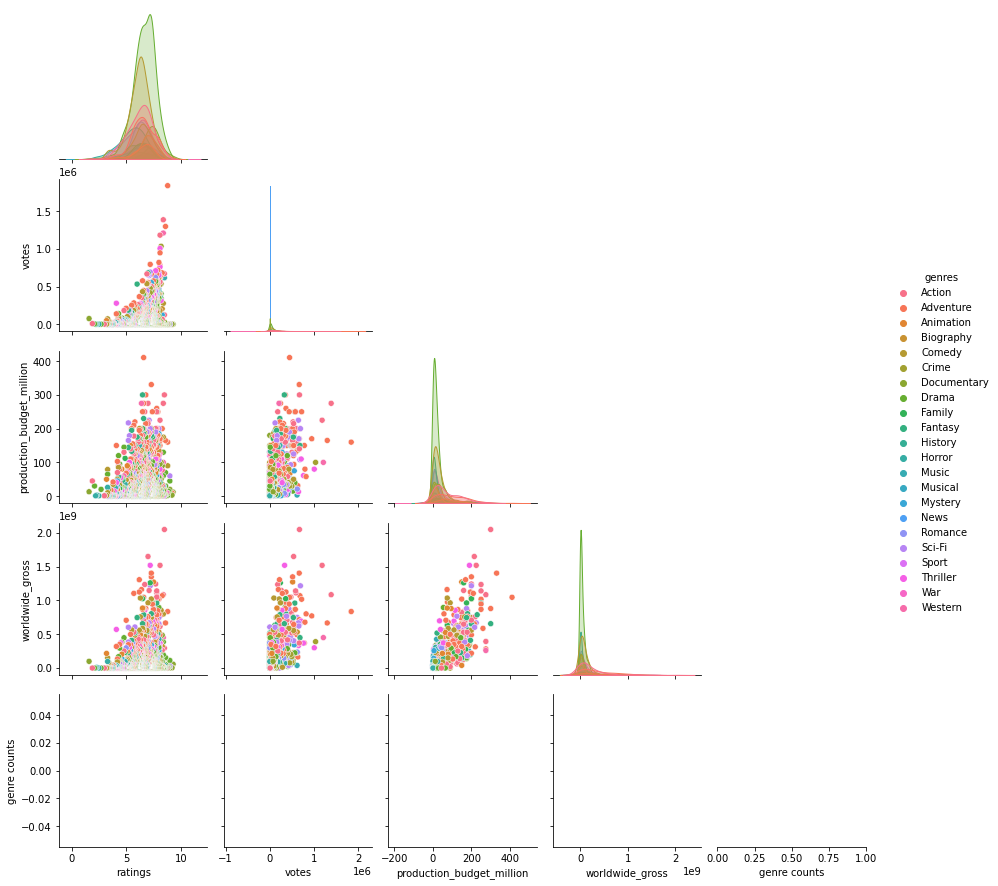

In [133]:
sns.pairplot(df, hue = 'genres', corner = True)

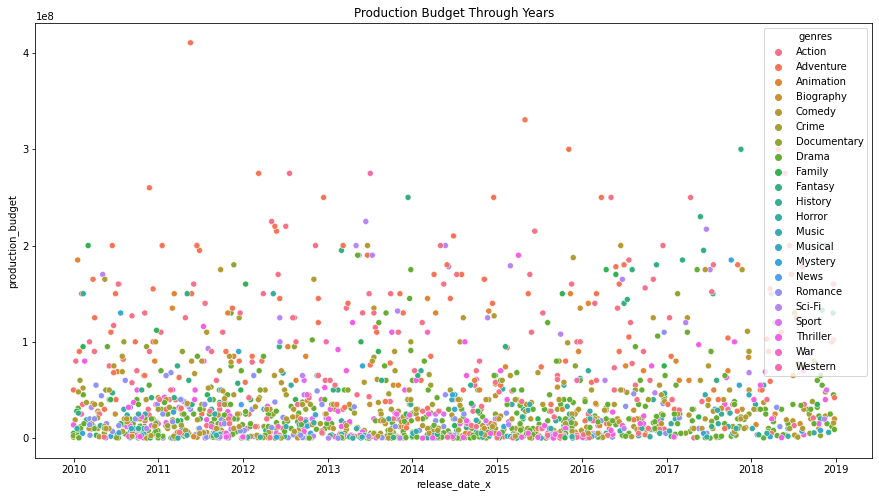

In [90]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'production_budget', hue = 'genres', data = df, ax = ax)
ax.set_title('Production Budget Through Years');

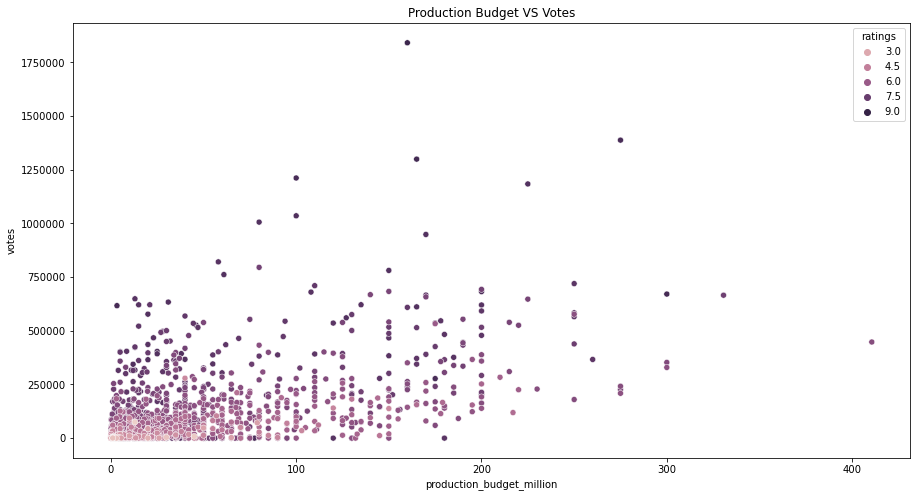

In [135]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'production_budget_million', y = 'votes', hue = 'ratings', data = df, ax = ax)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

<AxesSubplot:xlabel='genres'>

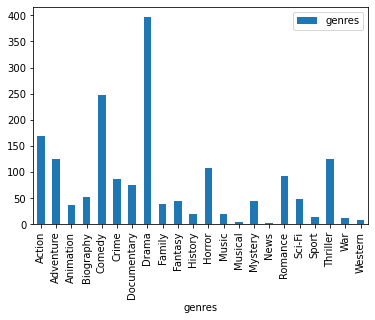

In [123]:
df_genre_counts.plot(kind='bar')